In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230106-105722.814 68658 INFO root:17 local study files stored in: /Users/sgpeo/projects/cellenium/cellenium/scratch


In [2]:
url = "https://figshare.com/ndownloader/files/24539828"
adata = prep.get_h5ad_from_url(url, "pancreas_atlas_original")

In [3]:
prep.jupyter_h5ad_overview(adata)

,tech,celltype,size_factors
D101_5,celseq,gamma,0.028492
D101_43,celseq,gamma,0.079348
D101_93,celseq,gamma,0.037932
D102_4,celseq,gamma,0.047685
D172444_23,celseq,gamma,0.038683
...,...,...,...
Sample_1594,smarter,gamma,1.000000
Sample_1595,smarter,gamma,1.000000
Sample_1597,smarter,gamma,1.000000
Sample_1598,smarter,gamma,1.000000


""
A1BG
A1CF
A2M
A2ML1
A4GALT
...
ZXDC
ZYG11B
ZYX
ZZEF1


(16382, 19093)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.6120808 , 0.        , 0.        , ..., 0.        , 2.6120806 ,
        0.        ],
       [0.        , 3.311074  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42996258, 2.6206095 , 0.        , ..., 2.1124895 , 1.0953737 ,
        1.0403827 ],
       [3.4695568 , 0.64595073, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4566651 , 0.5159923 , 0.        , ..., 0.        , 0.53929645,
        0.        ]], dtype=float32)

(16382, 19093)

array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 1.0019583,  0.       ,  0.       , ...,  0.       ,  1.001958 ,
         0.       ],
       [ 0.       ,  1.0019583,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.5372   , 12.7441   ,  0.       , ...,  7.2688   ,  1.9903   ,
         1.8303   ],
       [31.1225   ,  0.9078   ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.5788   ,  0.6753   ,  0.       , ...,  0.       ,  0.7148   ,
         0.       ]], dtype=float32)

OverloadedDict, wrapping:
	OrderedDict()
With overloaded keys:
	['neighbors'].

20230106-105738.298 68658 INFO root:93 make_sparse: conversion to sparse matrix done
20230106-105750.416 68658 INFO root:118 make_norm_expression: no transformations necessary
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/sgpeo/opt/miniconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will b

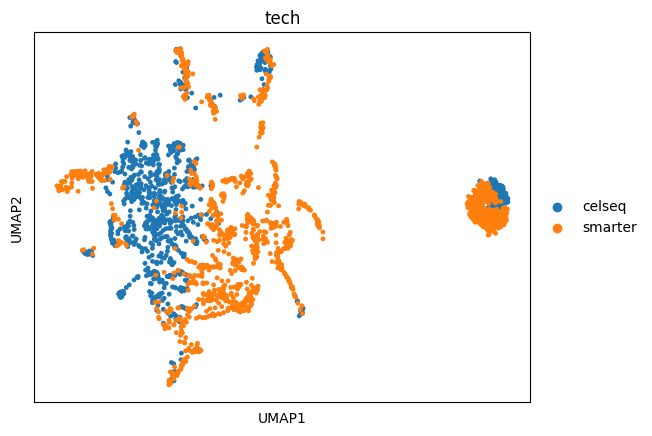

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

adata = prep.adata_subset_for_testing(adata, 'tech', ["celseq","smarter"], 200)

prep.add_umap(adata)
sc.pl.umap(adata, color='tech')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['celltype','tech'])

diff.exp. genes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 11.03it/s]
20230106-105759.923 68658 INFO root:208 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['celltype', 'tech']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,INHBA,10.681683,2.033295,1.240036e-26,1.907747e-25,alpha,_OTHERS_,celltype
1,RSAD2,1.664440,0.797751,9.602453e-02,1.979887e-01,alpha,_OTHERS_,celltype
2,DLK1,24.215004,7.728511,1.546228e-129,3.092455e-127,beta,_OTHERS_,celltype
3,MT1X,15.284418,2.823437,9.712639e-53,9.712639e-51,beta,_OTHERS_,celltype
4,IGFBP5,11.329806,2.025131,9.341096e-30,4.670548e-28,beta,_OTHERS_,celltype
...,...,...,...,...,...,...,...,...
422,SERPINE1,2.889478,3.442719,3.858814e-03,8.671493e-03,celseq,_OTHERS_,tech
423,AMY2A,2.842070,3.962490,4.482164e-03,9.850911e-03,celseq,_OTHERS_,tech
424,G0S2,2.367533,1.342405,1.790714e-02,3.692194e-02,celseq,_OTHERS_,tech
425,COL3A1,2.295061,3.597092,2.172965e-02,4.389828e-02,celseq,_OTHERS_,tech


# final h5ad file

In [6]:
adata.write(prep.basedir.joinpath("pancreas_atlas_subset.h5ad"))
prep.jupyter_h5ad_overview(adata)

,tech,celltype,size_factors,n_genes
D101_5,celseq,gamma,0.028492,1857
D101_43,celseq,gamma,0.079348,3724
D101_93,celseq,gamma,0.037932,2261
D102_4,celseq,gamma,0.047685,2653
D172444_23,celseq,gamma,0.038683,2230
...,...,...,...,...
Sample_1594,smarter,gamma,1.000000,5842
Sample_1595,smarter,gamma,1.000000,5196
Sample_1597,smarter,gamma,1.000000,6356
Sample_1598,smarter,gamma,1.000000,4170


,n_cells,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
ACP5,733,False,0.066578,2.948855,-1.482115,6,False
ACTA1,403,False,0.066829,3.532015,-0.941704,4,False
AKR1B10,2013,False,2.834556,6.259078,-0.245735,4,False
AKR1C1,2910,False,2.916795,5.629438,-1.215314,4,False
AKR1C2,2253,False,2.598710,6.069993,0.035646,4,False
...,...,...,...,...,...,...,...
TPSB2,110,True,0.967110,6.964861,1.492120,6,False
TSPAN8,2601,False,2.861040,5.651023,-1.182074,3,False
TYROBP,214,True,0.644817,6.505171,1.276444,6,False
VCAM1,1032,False,1.044938,4.540277,-1.151451,3,False


(2496, 200)

<2496x200 sparse matrix of type '<class 'numpy.float32'>'
	with 48719 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	OrderedDict([('hvg', {'flavor': 'seurat'}), ('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'n_pcs': 20}}), ('umap', {'params': {'a': 0.5830300205483709, 'b': 1.334166992455648}}), ('tech_colors', ['#1f77b4', '#ff7f0e']), ('cellenium', {'differentially_expressed_genes':         names     scores  logfoldchanges          pvals      pvals_adj  \
0       INHBA  10.681683        2.033295   1.240036e-26   1.907747e-25   
1       RSAD2   1.664440        0.797751   9.602453e-02   1.979887e-01   
2        DLK1  24.215004        7.728511  1.546228e-129  3.092455e-127   
3        MT1X  15.284418        2.823437   9.712639e-53   9.712639e-51   
4      IGFBP5  11.329806        2.025131   9.341096e-30   4.670548e-28   
..        ...        ...             ...            ...            ...   
422  SERPINE1   2.889478        3.442719   3.858814e-03  